#### Importing dplyr and ggplot2 libraries for manipulating data and plotting graphs respectively

In [504]:
library(dplyr)
library(ggplot2)


#### Read source csv file as dataframe

In [505]:
data<-as.data.frame(read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv",stringsAsFactors=TRUE))

#### Hypothesis: People having both smartphone AND broadband tend to have higher income.

#### Process: Selecting and filtering data based on people having smartphone(smart1), broadband(home4nw and bbhome1),valid income data(inc). After filtering out income data, removing smartphone,broadband fields as they aren't used for plotting. Plotting income vs count of filtered people.

#### Result: As seen from the plot, our hypothesis is correct as people with income >$50k are more in number having smartphone and broadband

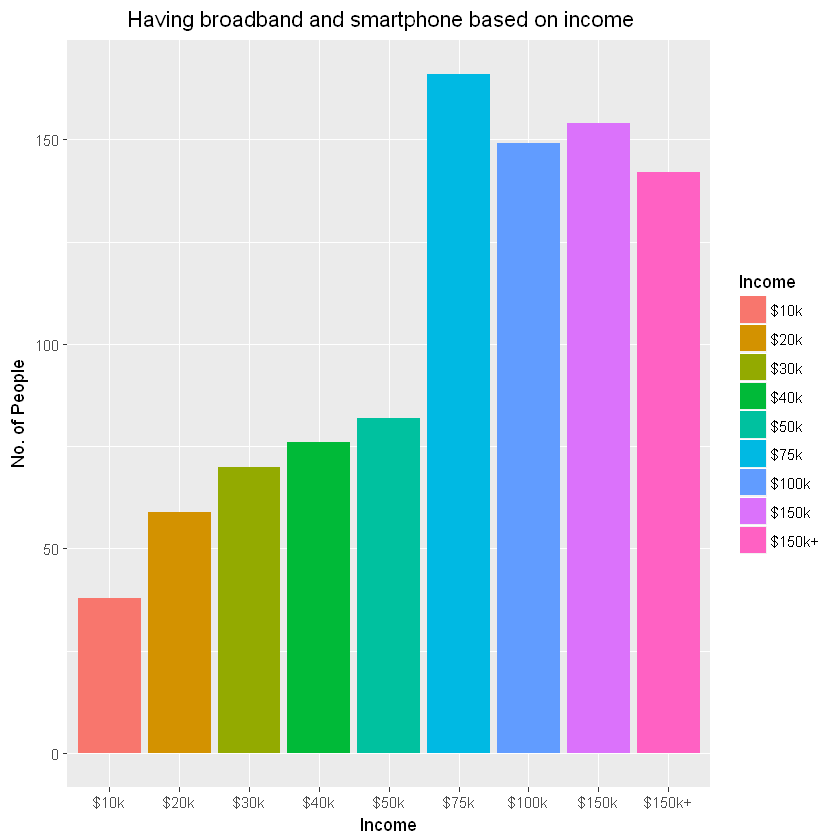

In [506]:
idata <- select(data,smart1,home4nw,bbhome1,inc)  
idata <- filter(idata,smart1==1)
idata <- filter(idata,home4nw==1)
idata <- filter(idata,bbhome1==2 | bbhome1==3)
idata <- filter(idata,inc<10)
idata <- as.data.frame(idata[,-1:-3])
names(idata) <- "Income"
idata <- within(idata, Income <- factor(Income, labels = c("$10k","$20k","$30k","$40k","$50k","$75k","$100k","$150k","$150k+")))
qplot(Income,data=idata,fill=Income, ylab = "No. of People", main = "          Having broadband and smartphone based on income")

#### Hypothesis: More people shop online using cellphone and more men shop online than women

#### Process: Selecting and filtering data based on having cellphone(device1a), gender(sex) and using cellphone for online shopping or not(q5b). After filtering requried data, removing having cellphone data field as it is not required further. Plotting onlineshopping through cellphone data vs no. of people and split based on gender.  

#### Result: Both hypothesis are proved wrong, as seen from our plots, more people don't tend to do online shopping through cellphone and women do more online shopping through cellphone than men

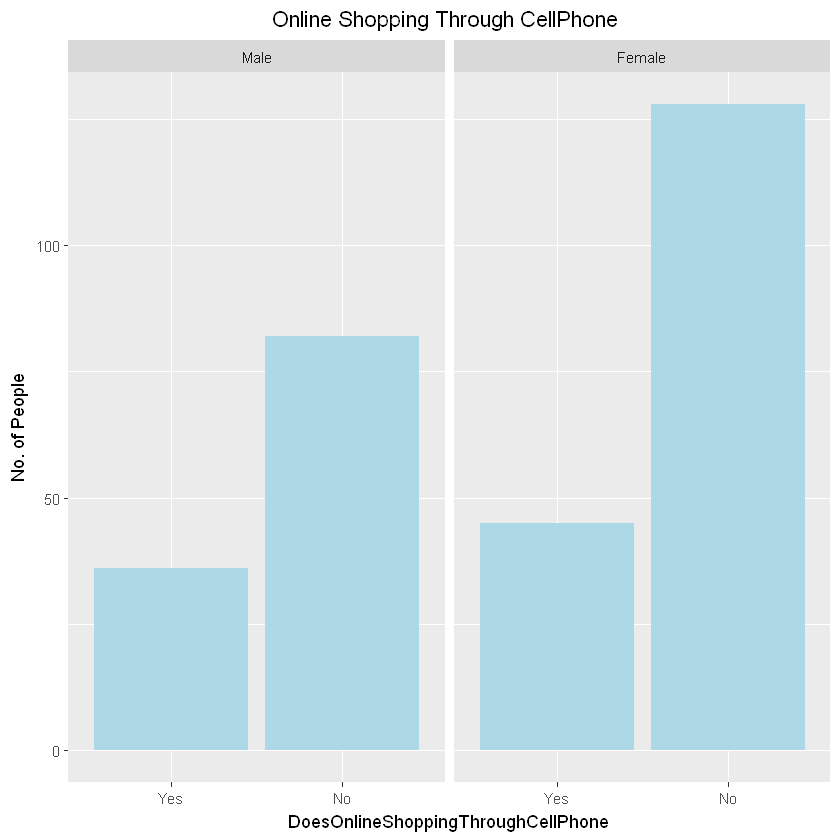

In [507]:
cdata <- select(data,device1a,sex,q5b)
cdata <- filter(cdata,device1a==1)
cdata <- filter(cdata,q5b<3)
cdata <- cdata[,-1]
cdata <- within(cdata, sex <- factor(sex, labels = c("Male","Female")))
cdata <- within(cdata, q5b <- factor(q5b, labels = c("Yes","No")))
names(cdata) <- c("Sex","DoesOnlineShoppingThroughCellPhone")
qplot(DoesOnlineShoppingThroughCellPhone, data=cdata, geom="bar", facets = . ~ Sex, fill=I("light blue"), ylab = "No. of People", main = "                                  Online Shopping Through CellPhone")



#### Hypothesis: Gamers are generally younger in age and there are more male gamers than female gamers

#### Process: Selecting and filtering people who are gamers(game1), age(age), gender(sex). Removing gamers field as it isn't used further. Plotting age vs sex with darker colors showing younger age and lighter colors showing brighter colors

#### Result: Our hypothesis is proved correct from the plots, as it shows more dots near less age category and in men

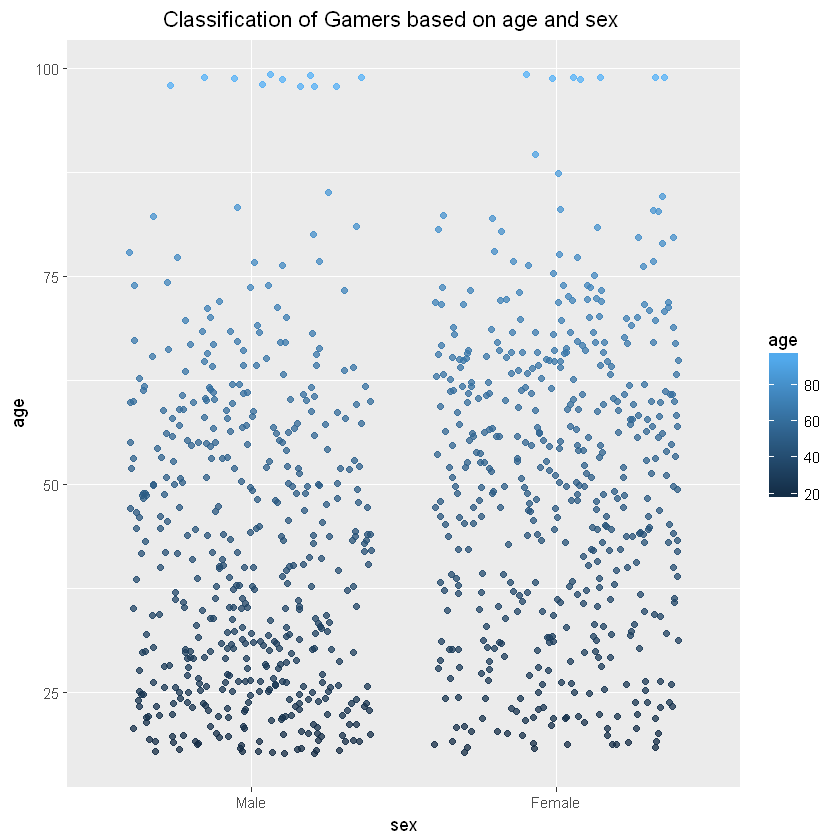

In [508]:
gdata <- select(data,game1,age,sex)
gdata <- filter(gdata,game1==1)
gdata <- gdata[,-1]
gdata <- within(gdata, sex <- factor(sex, labels = c("Male", "Female")))
qplot(sex, age, colour = age, data=gdata, geom="jitter", alpha=I(0.75), main = "                Classification of Gamers based on age and sex")


#### Hypothesis: Higher roles like Managers and Professionals will feel their jobs will exist after 50 years while others will feel it wont exist

#### Process: Selecting and filtering data based on employment type(emplnw), thoughts about job existing after 50 years(auto2), job type(emptype3). Plotting thoughts vs no. of people graph along with job type as bar filler

#### Result: Our hypothesis is mostly true, as Professionals feel their job will definitely still exist after 50 years while Managers think their jobs will probably exist. Other jobs like clerical don't feel their job will definitely exist

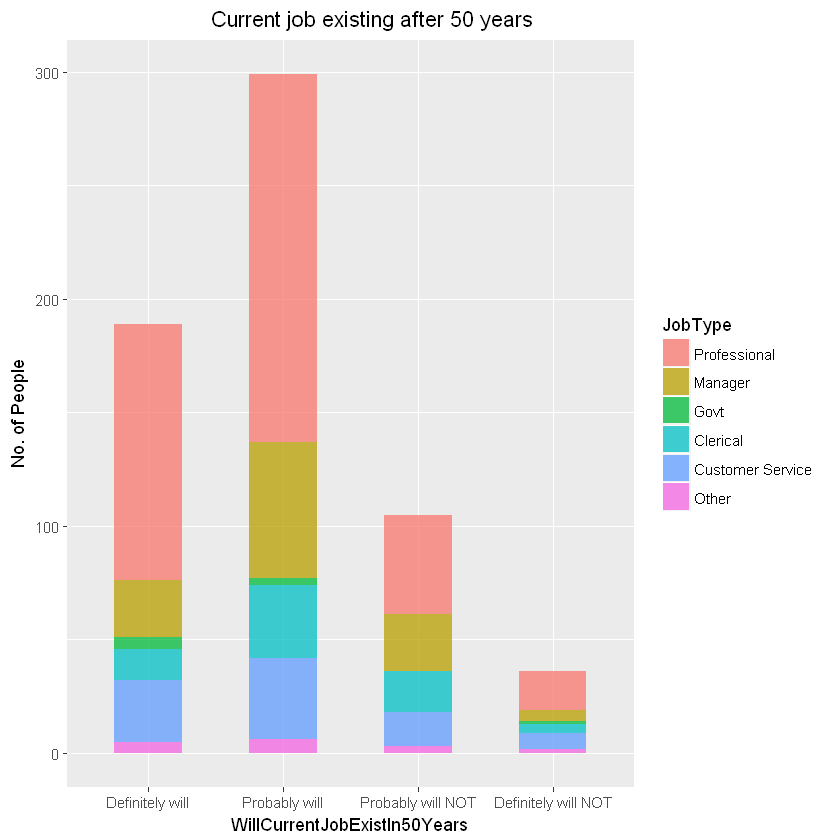

In [509]:
j1data <- select(data,emplnw,auto2,emptype3)
j1data <- filter(j1data,emplnw<3)
j1data <- filter(j1data,auto2<5)
j1data <- filter(j1data,emptype3<7)
j1data <- within(j1data, auto2 <- factor(auto2, labels = c("Definitely will","Probably will","Probably will NOT","Definitely will NOT")))
j1data <- within(j1data, emplnw <- factor(emplnw, labels = c("Full time","Part time")))
j1data <- within(j1data, emptype3 <- factor(emptype3, labels = c("Professional","Manager","Govt","Clerical","Customer Service","Other")))
names(j1data) <- c("EmploymentType","WillCurrentJobExistIn50Years","JobType")
ggplot(j1data,aes(x=WillCurrentJobExistIn50Years, fill=JobType))+geom_bar(width = 0.5, alpha = aes(0.75)) + labs(title = '                        Current job existing after 50 years',y="No. of People")




#### Hypothesis: 
#### 1. People aged over 60 tend to be more in no manual labor jobs
#### 2. Men are more in manual labor jobs than women.
#### 3. No manual labor jobs have higher income than manual labor jobs
#### 4. Full time employees are more than part time employees and businessmen

#### Process: Selecting and filtering data based on employment type(emplnw), income(inc), labor or not(emptype2), gender(sex), age(age). Age is filtered into two types: Under 60 (younger people) and 60 and above (older people). Plotting employment type vs income graph spilt by manual labor or not and age less or over 60. 

#### Results:
#### Based on our hypothesis,

#### 1. People over 60 are less in manual labor jobs as there are very less dots while in no manual jobs there are more older people.
#### 2. Men are more in manual labor as there are more orange colored dots in manual labor than green colored dots(women).
#### 3. Mostly no manual labor jobs have higher income than manual labor jobs as we can see so many dots in no manual labor compared to manual labor
#### 4. Full time employees are very much higher (in both manual labor and no manual labor) than part time employees and businessman, as seen from so many dots

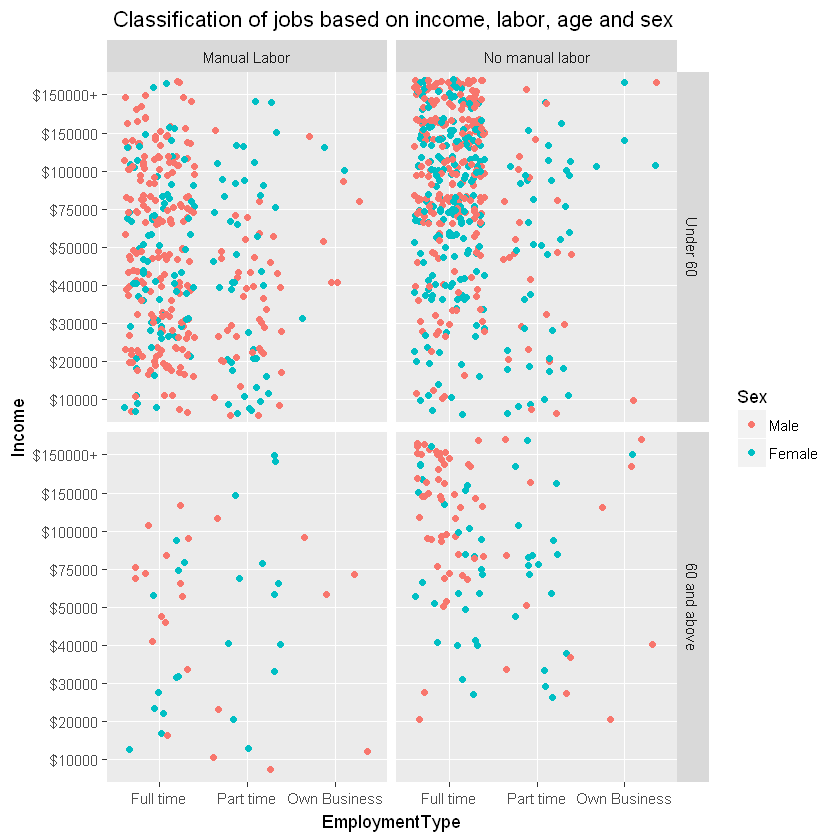

In [510]:
jdata <- select(data,emplnw,inc,emptype2,sex,age)
jdata <- filter(jdata,emplnw==5 | emplnw<3)
jdata <- filter(jdata,emptype2<3)
jdata <- filter(jdata,inc<10)
jdata$age[jdata$age<60] <- 1
jdata$age[jdata$age>1] <- 2
jdata <- within(jdata, age <- factor(age, labels = c("Under 60","60 and above")))
jdata <- within(jdata, emplnw <- factor(emplnw, labels = c("Full time","Part time","Own Business")))
jdata <- within(jdata, inc <- factor(inc, labels = c("$10000","$20000","$30000","$40000","$50000","$75000","$100000","$150000","$150000+")))
jdata <- within(jdata, emptype2 <- factor(emptype2, labels = c("Manual Labor","No manual labor")))
jdata <- within(jdata, sex <- factor(sex, labels = c("Male","Female")))
names(jdata) <- c("EmploymentType","Income","IncludesManual","Sex","Age")
ggplot(jdata,aes(EmploymentType,Income,col=Sex))+geom_jitter() + facet_grid(Age ~ IncludesManual) + labs(title = ' Classification of jobs based on income, labor, age and sex')
